In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('/home/dhananjaya/adi/archive (3)/Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


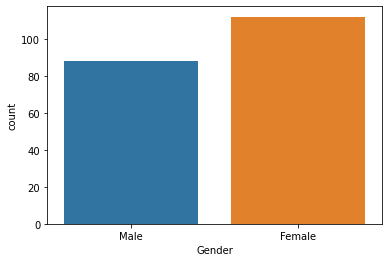

In [42]:
sns.countplot('Gender',data=df)

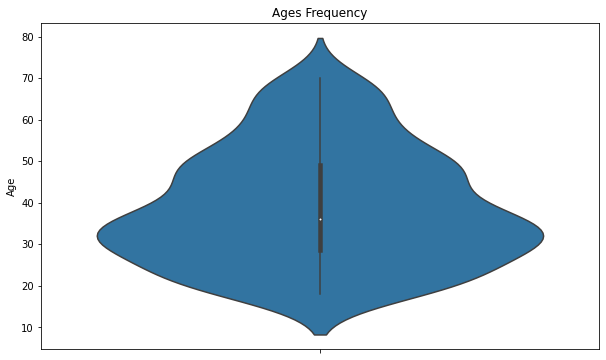

In [41]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

In [46]:
x_data=df.iloc[:,3:5].values

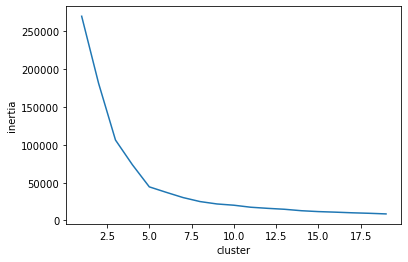

In [48]:
inertia=[]

for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit_transform(x_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,20),inertia)
plt.xlabel('cluster')
plt.ylabel('inertia')
plt.show()

In [49]:
k_means=KMeans(n_clusters=5,init='k-means++')
pred=k_means.fit_predict(x_data)

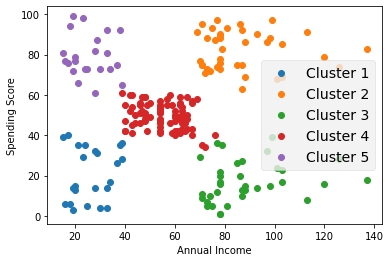

In [56]:
#for k in range(5) : 
plt.scatter(x_data[pred == 0, 0], x_data[pred == 0, 1] , label = 'Cluster 1')
plt.scatter(x_data[pred == 1, 0], x_data[pred == 1, 1] , label = 'Cluster 2')
plt.scatter(x_data[pred == 2, 0], x_data[pred == 2, 1] , label = 'Cluster 3')
plt.scatter(x_data[pred == 3, 0], x_data[pred == 3, 1] , label = 'Cluster 4')
plt.scatter(x_data[pred == 4, 0], x_data[pred == 4, 1] , label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:0],kmeans.cluster_centers_[:1],label='centroid')
plt.style.use('fivethirtyeight')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()